# recognising handwritten digits on mnist dataset using knn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# step 1: Data Preparation

In [2]:
df=pd.read_csv('./mnist_2_train.csv')
print(df.shape)

(19999, 785)


In [3]:
print(df.columns)

Index(['0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9',
       ...
       '0.670', '0.671', '0.672', '0.673', '0.674', '0.675', '0.676', '0.677',
       '0.678', '7'],
      dtype='object', length=785)


In [4]:
df.head(n=5)

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.670,0.671,0.672,0.673,0.674,0.675,0.676,0.677,0.678,7
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [15]:
data=df.values
np.random.shuffle(data)
print(data.shape)
print(type(data))
X=data[:,:784]
Y=data[:,784]
print(Y)
print(X.shape,Y.shape)

(19999, 785)
<class 'numpy.ndarray'>
[1 2 8 ... 3 6 3]
(19999, 784) (19999,)


In [16]:
split=int(0.8*(X.shape[0]))
print(split)
X_train=X[:split,:]
Y_train=Y[:split]

X_test=X[split:,:]
Y_test=Y[split:]

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)


15999
(15999, 784) (15999,)
(4000, 784) (4000,)


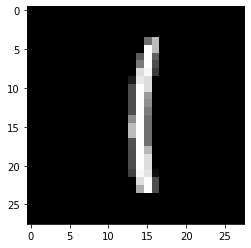

1


In [17]:
# visualize some samples
def drawing(Sample):
    img=Sample.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.show()
drawing(X_train[0])
print(Y_train[0])

# step 2: K-NN

In [18]:
# can we apply knn to this data?

In [19]:
def dist(x1,x2):
    return np.sqrt(sum(x1-x2)**2)
def knn(x,y,querypoint,k=9):
    vals=[]
    m=x.shape[0]
    for i in range(m):
        d=dist(querypoint,x[i])
        vals.append((d,y[i]))
    vals=sorted(vals)
    # nearest/first k points
    vals=vals[:k]
    vals=np.array(vals)
    new_vals=np.unique(vals[:,1],return_counts=True)
    #print(new_vals)
    max_freq_index=new_vals[1].argmax()
    pred=new_vals[0][max_freq_index]
    return pred
        
    

# step 3: make predictions

4


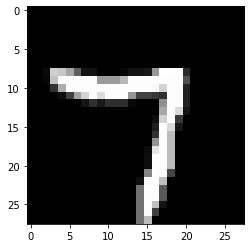

7


In [29]:
pred=knn(X_train,Y_train,X_test[0])
print(int(pred))
drawing(X_test[0])
print(Y_test[0])


In [35]:
# write one method to compute accuracy of knn over the test set!
def acc(y,y_):
    return float((y==y_).sum())/100
y_=[]
for i in range(100):
    y_.append(knn(X_train,Y_train,X_test[i]))
y_=np.array(y_)
print(y_.shape[0],Y_test[:3].shape[0])
print(acc(Y_test[:100],y_))
    

100 3
0.21
